In [152]:
#Importing relevant libraries
import bs4
from bs4 import BeautifulSoup
import requests
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns

In [145]:
#For Graphs
%matplotlib inline

In [2]:
# Read the data from a URL
url = requests.get("https://top500.org/statistics/sublist/")

# Parse the URL using Beautiful Soup library
soup = BeautifulSoup(url.content,'html')

In [80]:
# Open an output file for writing the csv data:
filename="Assignment8_Kanaparthy.csv"

#Open the file in write mode
f=open(filename,"w",newline='')
csv_data = csv.writer(f,lineterminator='\n')

#Adding headers
headers = "Rank,System,Cores,Rmax,Rpeak,Power\n"
f.write(headers)

35

In [81]:
for record in soup.findAll('tr'):
# Creating an empty variable to record the data
        tbltxt = []
# Adding table data to tbltxt and cleaning it
        for data in record.findAll('td'):
            tbltxt.append(data.text.replace('\n',' '))
        if tbltxt:    
            csv_data = csv.writer(f)
            csv_data.writerow(tbltxt)
f.close()

In [82]:
#Populating csv data in a dataframe
df=pd.read_csv('Assignment8_Kanaparthy.csv',index_col=False)

In [83]:
df

,Rank,System,Cores,Rmax,Rpeak,Power
0,1,"Supercomputer Fugaku - Supercomputer Fugaku,...","7,630,848","442,010.0","537,212.0","29,899"
1,2,"Summit - IBM Power System AC922, IBM POWER9 ...","2,414,592","148,600.0","200,794.9","10,096"
2,3,"Sierra - IBM Power System AC922, IBM POWER9 ...","1,572,480","94,640.0","125,712.0","7,438"
3,4,"Sunway TaihuLight - Sunway MPP, Sunway SW260...","10,649,600","93,014.6","125,435.9","15,371"
4,5,"Perlmutter - HPE Cray EX235n, AMD EPYC 7763 ...","706,304","64,590.0","89,794.5","2,528"
...,...,...,...,...,...,...
495,496,"Internet Company T X1 - Lenovo RD450, Xeon E...","82,880","1,537.2","3,182.6",NaN
496,497,"LANL CTS-1 Grizzly - Tundra Extreme Scale, X...","53,352","1,524.7","1,792.6",603
497,498,"Lenovo HR650x, Xeon Gold 6133 20C 2.5GHz, 25G...","35,200","1,521.9","2,816.0",NaN
498,499,"U1 - ThinkSystem SR650, Xeon Gold 6140 18C 2...","29,792","1,521.0","2,444.7",NaN


In [85]:
#Created a function to filter for US, China and Japan
def country_string(country):
    if 'japan' in country.lower():
        return 'Japan'
    elif 'united states' in country.lower():
        return 'United States'
    elif 'china' in country.lower():
        return 'China'
    else:
        return ''

In [86]:
#Creating a new column with US, China and Japan filtering
df['Country']=(df['System'].apply(lambda x: country_string(x)))

In [87]:
#Creating a dataframe with only US, China and Japan
df2=df[df['Country'] != ""]
df2

,Rank,System,Cores,Rmax,Rpeak,Power,Country
0,1,"Supercomputer Fugaku - Supercomputer Fugaku,...","7,630,848","442,010.0","537,212.0","29,899",Japan
1,2,"Summit - IBM Power System AC922, IBM POWER9 ...","2,414,592","148,600.0","200,794.9","10,096",United States
2,3,"Sierra - IBM Power System AC922, IBM POWER9 ...","1,572,480","94,640.0","125,712.0","7,438",United States
3,4,"Sunway TaihuLight - Sunway MPP, Sunway SW260...","10,649,600","93,014.6","125,435.9","15,371",China
4,5,"Perlmutter - HPE Cray EX235n, AMD EPYC 7763 ...","706,304","64,590.0","89,794.5","2,528",United States
...,...,...,...,...,...,...,...
495,496,"Internet Company T X1 - Lenovo RD450, Xeon E...","82,880","1,537.2","3,182.6",NaN,China
496,497,"LANL CTS-1 Grizzly - Tundra Extreme Scale, X...","53,352","1,524.7","1,792.6",603,United States
497,498,"Lenovo HR650x, Xeon Gold 6133 20C 2.5GHz, 25G...","35,200","1,521.9","2,816.0",NaN,China
498,499,"U1 - ThinkSystem SR650, Xeon Gold 6140 18C 2...","29,792","1,521.0","2,444.7",NaN,China


In [23]:
#Creating a new CSV file with country data
new_filename = "Assignment8_Kanaparthy_country.csv"
f2 = open(new_filename, "w")

In [88]:
#Exporting data to csv
df2.to_csv('Assignment8_Kanaparthy_country.csv')
f2.close()

In [89]:
#Checking the datatypes
df2.dtypes

Rank        int64
System     object
Cores      object
Rmax       object
Rpeak      object
Power      object
Country    object
dtype: object

In [125]:
#Calling the data to a new dataframe to do conversions
new_data = pd.read_csv("Assignment8_Kanaparthy_country.csv", sep=",", encoding='mac_roman')

In [132]:
new_data.drop('Unnamed: 0', axis=1, inplace=True)

In [126]:
#Convert the objects to float and string respectively
new_data['Cores'] = new_data.Cores.str.replace(',', '').astype(float)
new_data['Rmax'] = new_data.Rmax.str.replace(',', '').astype(float)
new_data['Rpeak'] = new_data.Rpeak.str.replace(',', '').astype(float)
new_data['Power'] = new_data.Power.str.replace(',', '').astype(float)
new_data['System'] = new_data.System.str.replace(',', '').astype('string')
new_data['Country'] = new_data.Country.str.replace(',', '').astype('string')

In [133]:
#Verifying the changes to datatypes
new_data.dtypes

Rank         int64
System      string
Cores      float64
Rmax       float64
Rpeak      float64
Power      float64
Country     string
dtype: object

In [134]:
#Summary stats
new_data.describe()

,Rank,Cores,Rmax,Rpeak,Power
count,344.000000,3.440000e+02,344.000000,344.000000,104.000000
mean,261.436047,1.715654e+05,5891.918023,9477.914826,2219.855769
std,135.025304,7.748726e+05,26573.425124,33583.894117,4187.413328
min,1.000000,1.664000e+03,1511.000000,1792.600000,61.000000
25%,160.750000,4.716000e+04,1685.925000,2987.125000,567.250000
50%,269.500000,5.760000e+04,2074.500000,4056.000000,958.000000
75%,368.250000,8.900000e+04,2743.375000,5495.025000,1499.000000
max,500.000000,1.064960e+07,442010.000000,537212.000000,29899.000000


In [135]:
#Grouping countries
grouped_df = new_data.groupby("Country")

In [136]:
#Get max values for all categories for each country
maximums = grouped_df.max()
maximums = maximums.reset_index()
maximums

,Country,Rank,System,Cores,Rmax,Rpeak,Power
0,China,500,ThinkSystem SR650 Xeon Gold 6248 20C 2.5GHz 2...,10649600.0,93014.6,125435.9,18482.0
1,Japan,485,PRIMERGY CX2550 M4 Xeon Gold 6248 20C 2.5GHz ...,7630848.0,442010.0,537212.0,29899.0
2,United States,497,Power 775 POWER7 8C 3.836GHz Custom Interconn...,2414592.0,148600.0,200794.9,13620.0


In [138]:
#Getting country with the highest Cores
maximums[['Country','Cores']].sort_values('Cores',ascending=False)

,Country,Cores
0,China,10649600.0
1,Japan,7630848.0
2,United States,2414592.0


In [139]:
#Getting country with the highest Rpeak
maximums[['Country','Rpeak']].sort_values('Rpeak',ascending=False)

,Country,Rpeak
1,Japan,537212.0
2,United States,200794.9
0,China,125435.9


In [140]:
#Getting country with the highest Power
maximums[['Country','Power']].sort_values('Power',ascending=False)

,Country,Power
1,Japan,29899.0
0,China,18482.0
2,United States,13620.0


In [141]:
#Getting min values to get the top ranks for each country
minimums = grouped_df.min()
minimums = minimums.reset_index()
minimums[['Country','Rank']].sort_values('Rank')

,Country,Rank
1,Japan,1
2,United States,2
0,China,4


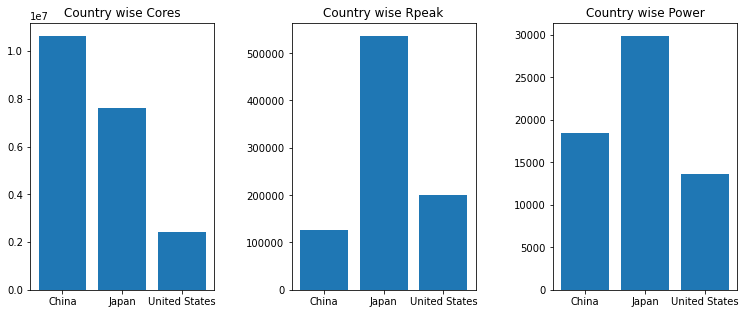

In [150]:
#Visualising the stats for countries in Cores, Rpeak and Power 
plt.figure(figsize=(11, 5))


plt.subplot(131)
plt.bar(maximums['Country'],maximums['Cores'])
plt.title('Country wise Cores')
plt.subplot(132)
plt.bar(maximums['Country'],maximums['Rpeak'])
plt.title('Country wise Rpeak')
plt.subplot(133)
plt.bar(maximums['Country'],maximums['Power'])
plt.title('Country wise Power')
plt.tight_layout(pad=3.0)
plt.show()

<AxesSubplot:xlabel='Country', ylabel='Rank'>

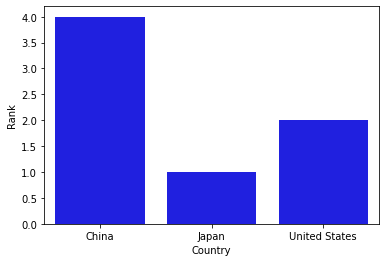

In [155]:
#Visulalising Rank
sns.barplot(x ='Country', y ='Rank', data = minimums,color='b')

In [178]:
#US Processor being frequently used
USprocessors= pd.DataFrame(df2[df2['Country']=='United States']['System'].str.rstrip(',').str.split(',').str[1])
USprocessors['System'].value_counts().nlargest(1)

 Xeon E5-2673v4 20C 2.3GHz    44
Name: System, dtype: int64

In [179]:
#Japan Processor being frequently used
Japanprocessors= pd.DataFrame(df2[df2['Country']=='Japan']['System'].str.rstrip(',').str.split(',').str[1])
Japanprocessors['System'].value_counts().nlargest(1)

 Xeon Gold 6148 20C 2.4GHz    5
Name: System, dtype: int64

In [180]:
#China Processor being frequently used
Chinaprocessors= pd.DataFrame(df2[df2['Country']=='China']['System'].str.rstrip(',').str.split(',').str[1])
Chinaprocessors['System'].value_counts().nlargest(1)

 Xeon Gold 6133 20C 2.5GHz    27
Name: System, dtype: int64